In [1]:
!pip install yfinance
!pip install yahoofinancials
import pandas as pd 
import yfinance as yf
from yahoofinancials import YahooFinancials

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 2.9 MB/s 
     |████████████████████████████████| 110 kB 9.8 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 4.1 MB 57.6 MB/s 
     |████████████████████████████████| 128 kB 62.3 MB/s 
     |████████████████████████████████| 112 kB 61.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Looking in indexes: https://pypi.org/simple, https:

In [3]:
df = yf.download('BTC-USD', start='2015-01-01', end='2022-12-31', progress=False)
df = df.reset_index()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
1,2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2,2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
3,2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
4,2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800
...,...,...,...,...,...,...,...
2916,2022-12-26,16842.250000,16920.123047,16812.369141,16919.804688,16919.804688,11886957804
2917,2022-12-27,16919.291016,16959.845703,16642.072266,16717.173828,16717.173828,15748580239
2918,2022-12-28,16716.400391,16768.169922,16497.556641,16552.572266,16552.572266,17005713920
2919,2022-12-29,16552.322266,16651.755859,16508.683594,16642.341797,16642.341797,14472237479


In [4]:
df = df[['Date','Close']]
df = df.rename(columns={'Date':'ds','Close':'y'})
df.tail(10)

,ds,y
2911,2022-12-21,16817.535156
2912,2022-12-22,16830.341797
2913,2022-12-23,16796.953125
2914,2022-12-24,16847.755859
2915,2022-12-25,16841.986328
2916,2022-12-26,16919.804688
2917,2022-12-27,16717.173828
2918,2022-12-28,16552.572266
2919,2022-12-29,16642.341797
2920,2022-12-30,16602.585938


In [5]:
df = df[:-1]
df

,ds,y
0,2015-01-01,314.248993
1,2015-01-02,315.032013
2,2015-01-03,281.082001
3,2015-01-04,264.195007
4,2015-01-05,274.473999
...,...,...
2915,2022-12-25,16841.986328
2916,2022-12-26,16919.804688
2917,2022-12-27,16717.173828
2918,2022-12-28,16552.572266


In [6]:
!pip install NeuralProphet
from neuralprophet import NeuralProphet
from matplotlib import pyplot as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 113 kB 5.0 MB/s 
     |████████████████████████████████| 706 kB 29.8 MB/s 
     |████████████████████████████████| 419 kB 51.1 MB/s 
     |████████████████████████████████| 232 kB 70.5 MB/s 
     |████████████████████████████████| 1.3 MB 51.7 MB/s 
     |████████████████████████████████| 51 kB 8.2 MB/s 
     |████████████████████████████████| 1.6 MB 71.5 MB/s 


In [7]:
m = NeuralProphet()
m.fit(df, freq='D', epochs=100)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.966% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.966% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO:NP.config:Auto-set batch_size to 32
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: 

Finding best initial lr:   0%|          | 0/237 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,40429.078125,48984.128906,0.324141,0.0,0
1,36714.089844,44950.105469,0.280424,0.0,1
2,31947.458984,39589.886719,0.225532,0.0,2
3,25015.591797,31275.962891,0.150068,0.0,3
4,17363.597656,21590.171875,0.077017,0.0,4
...,...,...,...,...,...
95,5088.951660,7472.896973,0.011001,0.0,95
96,5078.554688,7491.296387,0.011002,0.0,96
97,5094.219727,7535.904297,0.011099,0.0,97
98,5084.579102,7507.922363,0.010985,0.0,98


In [8]:
future = m.make_future_dataframe(df, periods=120)
forecast = m.predict(future)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.966% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.966% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.167% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.167% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: 92it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2022-12-30,None,31744.214844,30919.669922,793.397095,31.148586
1,2022-12-31,None,31833.742188,30910.007812,933.937988,-10.202703
2,2023-01-01,None,31970.660156,30900.347656,1070.225586,0.085863
3,2023-01-02,None,32109.714844,30890.685547,1201.888062,17.140789
4,2023-01-03,None,32197.078125,30881.021484,1328.610474,-12.552444


In [9]:
future.tail()

,ds,y
115,2023-04-24,None
116,2023-04-25,None
117,2023-04-26,None
118,2023-04-27,None
119,2023-04-28,None


WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


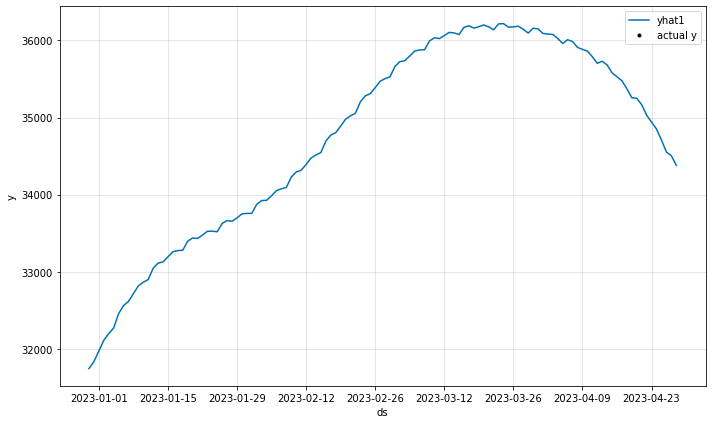

In [10]:
plot1 = m.plot(forecast)

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


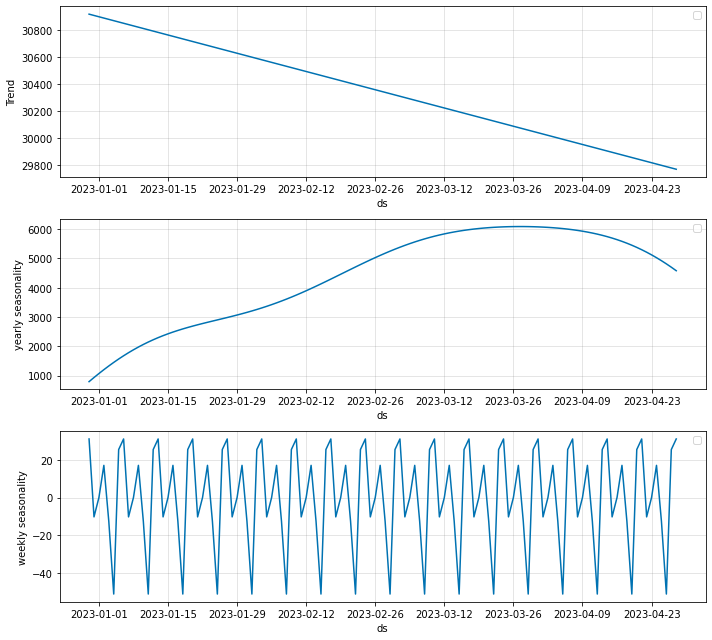

In [11]:
plot2 = m.plot_components(forecast)